In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

In [3]:
##Data Aquisition
me = np.load('LO_3_0.01/NJ_LO_3_0.01_500000.npy', allow_pickle=True) #Matrix elements
momentum = np.load('LO_3_0.01/PS3_0.01_500000.npy', allow_pickle=True, encoding='bytes') #4-momenta of input states
momentum = np.array([np.array(element) for element in momentum])

In [4]:
##Minkowski product of 4-vectors p1, p2.
def m_prod_arr(p1, p2):
    #Input: p1, p2 - n x 4 dimensional numpy array.
    #Output: n dimensional numpy array.
    return np.multiply(p1[:,0], p2[:,0]) - np.sum(np.multiply(p1[:,1:], p2[:,1:]), axis=1)

In [12]:
def m_prod(p1, p2):
    return np.multiply(p1[0], p2[0]) - np.sum(np.multiply(p1[1:], p2[1:]))

In [5]:
#Helpful sums
p_12 = np.sum(np.array(momentum)[:,2:4], axis=1) #p1+p2
p_13 = np.sum(np.array(momentum)[:,2:5:2], axis=1) #p1+p3
p_23 = np.sum(np.array(momentum)[:,3:5], axis=1) #p2+p3

In [6]:
s_12 = m_prod_arr(p_12, p_12)
s_13 = m_prod_arr(p_13, p_13)
s_23 = m_prod_arr(p_23, p_23)
S = s_12 + s_13 + s_23 #Center of mass energy

In [7]:
x1 = np.divide(s_12, S)
x2 = np.divide(s_13, S)


x1i = np.linspace(0, 1, 500) #x1 coordinates
x2i = np.linspace(0, 1, 500) #x2 coordinates
X1i, X2i = np.meshgrid(x1i, x2i) #2d regularly spaced grid of coordinates.

In [8]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x1, x2), me, (X1i, X2i), method='nearest') 

Text(0.5,0,'x1')

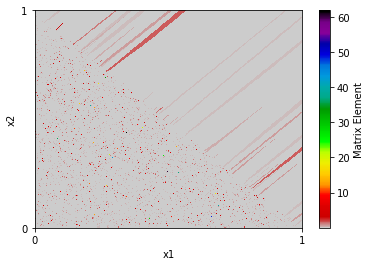

In [9]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r') #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x1')

In [85]:
def analytic_me(q1, q2, p1, p2, p3):
    constants = 1
    return constants*(m_prod(p1, q1)**2 + m_prod(p1, q2)**2 + m_prod(p2, q1)**2 + m_prod(p2, q2)**2)/(m_prod(p1, p3)*m_prod(p2, p3))

In [86]:
print(momentum[2])
print(analytic_me(*momentum[2]))

[[ 500.            0.            0.          500.        ]
 [ 500.            0.            0.         -500.        ]
 [ 192.85568202 -112.9647206   151.79019507  -37.30982002]
 [ 399.15658211   99.79446484   68.71569135  380.32248893]
 [ 407.98773587   13.17025576 -220.50588642 -343.01266892]]
5.529835173358089


In [81]:
for i in range(40):
    print(analytic_me(*momentum[i])/me[i])

173.5471146981917
20.744929493669705
560.7104035691808
7.327481791739248
16725.779732239826
103.71798931776442
195.87190349751327
14050.935544482772
3348.2659721944
1525.9744594822262
1182.6247038283789
3240.5328585096017
1264.1980699542569
6955.749859552263
16493.631750943776
65.06344249607504
926.0030080351967
737.6117013356518
52.326614524187804
6.330419334587654
661.7086720467684
0.413422506988629
127.68402667855845
1145.5120508469508
461.75497289758533
88.9916191129211
850.9732620222661
10594.127974562847
1390.0723478334216
1892.3275375241997
3142.1457922426034
671.1088769100951
1922.6586328934973
2.411275349081551
47.24942145839784
1.839986991627478
1401.4431152405464
380.4804950375234
71.37984786449475
1058.864533942723


In [58]:
print(sum([(analytic_me(*momenta)/S[0] - me[i])**2 for i, momenta in enumerate(momentum)])/len(me))

0.5999739394634733


In [ ]:
analytic_grid = analytic_me()

In [ ]:
fig, ax = plt.subplots()

im = ax.pcolor(grid, cmap = 'nipy_spectral_r') #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x1')

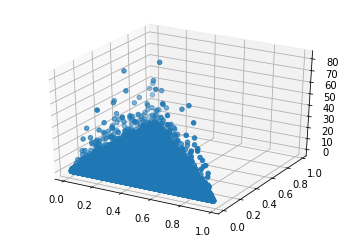

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, me, marker='o')